In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

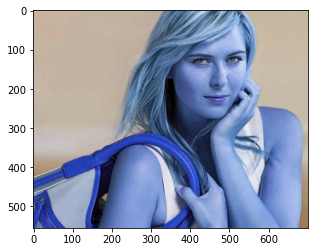

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape


(555, 700)

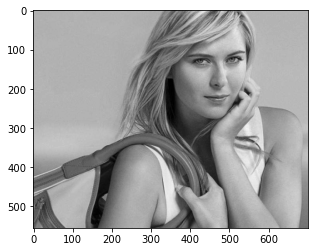

In [7]:
plt.imshow(gray, cmap='gray')

In [9]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") 
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")


faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]])

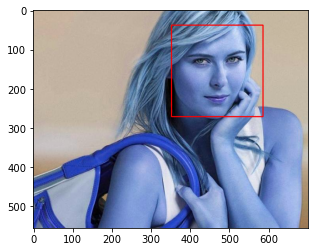

In [10]:
(x,y,w,h) = faces[0]
x,y,w,h
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [26]:
import cv2

face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") #Note the change

img = cv2.imread('./test_images/sharapova1.jpg')
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces=face_cascade.detectMultiScale(gray_img, scaleFactor=1.05,minNeighbors=5)

for x, y, w, h in faces:
    img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)

resized=cv2.resize(img,(int(img.shape[1]/3), int(img.shape[0]/3))) 

cv2.imshow("Deteced-face",resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

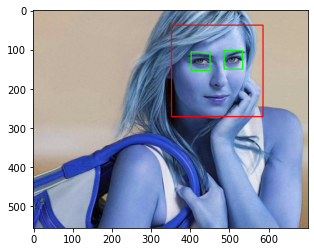

In [13]:
cv2.destroyAllWindows()
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

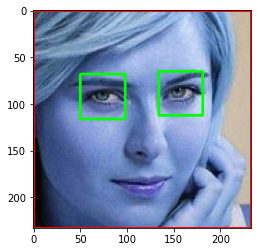

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [15]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

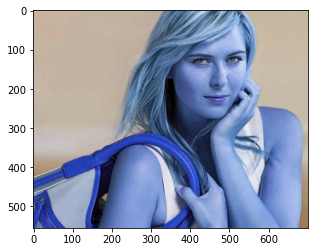

In [16]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

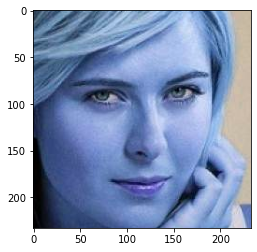

In [42]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

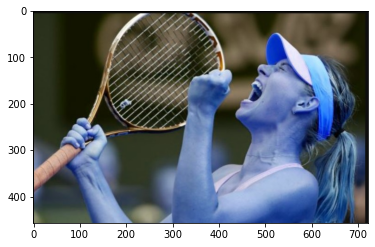

In [18]:
org_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [19]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_no_2_eyes

In [35]:
path_to_data = "../images_dataset/"
path_to_cr_data = "./dataset/cropped/"

In [36]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [37]:
img_dirs

['../images_dataset/lionel_messi',
 '../images_dataset/maria_sharapova',
 '../images_dataset/roger_federer',
 '../images_dataset/serena_williams',
 '../images_dataset/virat_kohli']

In [38]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [39]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  

lionel_messi
Generating cropped images in folder:  ../images_dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ../images_dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ../images_dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ../images_dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ../images_dataset/cropped/virat_kohli


## Preprocessing: Use wavelet transform as a feature for traning our model

In [40]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

(124, 124, 3)

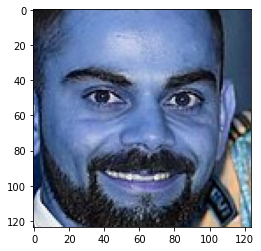

In [44]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
cropped_img = np.array(roi_color)
cropped_img.shape

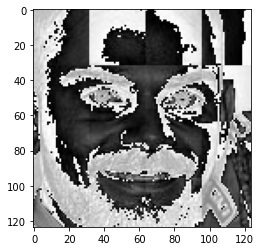

In [45]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [46]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

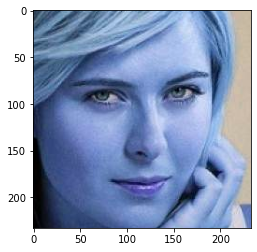

In [47]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

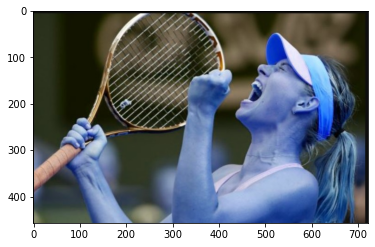

In [48]:
org_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [49]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
cropped_image_no_2_eyes

In [50]:
print("hallo")

hallo


In [52]:
conda activate tf


Note: you may need to restart the kernel to use updated packages.


In [54]:
import tensorflow

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
conda create -n tensorflow python=3.9
activate tensorflow
pip install --ignore-installed --upgrade tensorflow

SyntaxError: invalid syntax (Temp/ipykernel_16544/413376683.py, line 1)

In [3]:
conda activate tf


Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow 

ModuleNotFoundError: No module named 'tensorflow'